In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [56]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')
# df = pd.read_csv('./../../data/processed/.csv')

sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()

sales = sales.loc[sales.sum(1).sort_values().index]

logsales = np.log10(sales)
demlogsales = logsales.subtract(logsales.mean(1), axis = 0)



Q = 10
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [3]:
yqs = sales.groupby(parts).sum()
# yqs.T.cov().sum().sum()

In [4]:
X = yqs.sum()
E = X.mean()

print(np.log10(X).var()*(np.log(10)*E)**2)
print(yqs.T.cov().sum().sum())
print(X.var())

3.3370312602685465e+21
3.133103239847798e+21
3.133103239847797e+21


In [5]:
# Sq = yqs.mean(1).mean() # approx un sq que es el valor lineal medio de los qs

# Sq**2*np.log(10)**2*(np.log10(yqs).T.cov().sum().sum())
(yqs.sum().sum()/17/Q)**2*np.log(10)**2*(np.log10(yqs).T.cov().sum().sum())

3.408678822628621e+21

In [6]:
logsales = np.log10(sales)

micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)

# noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)

In [7]:
# common_R + noise_qs + base_qs - yqs == 0

In [8]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)


In [9]:
nqs = parts.value_counts().values
lognqs = np.log10(nqs)


In [ ]:
### The outcome of bootstrap is having the zero shock time series of quantiles and the 'all included time series of quantiles'.

# Additive decomposition

In [301]:
15%10

5

In [594]:
## Same plot but bootstrapped. Also, allow smaller s.

n = 100
Q = 10

sample = sales.sample(frac = .5); sample = sample.loc[sample.sum(1).sort_values().index] #sorting
sizes = sample.loc[sample.sum(1).sort_values().index].sum(1)
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()
eff_nq = sample.groupby(parts).count().mean(1).round().astype(int)

for size_sorting in [True, False]:
    
    base_out_list = []
    total_out_list = []

    for m in range(n):
        if m%10 == 0: print(m)
        for s in [.02, .05, .1, .25, .5]:

            df_bs = sales.sample(frac = .5)
            
            if size_sorting: df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

            logsales = np.log10(df_bs)

            micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
            zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)

            simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

            total = np.power(10, zero_shock + simu_shocks)
            base = np.power(10, zero_shock)

            total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))
            nqs = total['q'].value_counts().values



            base_yqs = base.groupby(total['q']).sum()
            total_yqs = total.groupby(total['q']).sum()        

            base_yqs['m'] = m; base_yqs['nqs'] = nqs; base_yqs['s'] = s;
            base_out_list += [base_yqs]

            total_yqs['m'] = m; total_yqs['nqs'] = nqs; total_yqs['s'] = s;
            total_out_list += [total_yqs]


    bs_base = pd.concat(base_out_list).reset_index().set_index(['q', 'm', 's', 'nqs'])
    bs_totl = pd.concat(total_out_list).reset_index().set_index(['q', 'm', 's', 'nqs'])
    
    # SAVE DATA
    bs_base.to_csv('./../../data/bootstraps/bs_base_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv')
    bs_totl.to_csv('./../../data/bootstraps/bs_totl_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv')



0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90


In [625]:
#### LOAD DATA
size_sorting = False

bs_base = pd.read_csv('./../../data/bootstraps/bs_base_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])

### ADDITIVE DECOMPOSITION

bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
fe_n = (bs_totl - bs_base)
fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
noise = fe_n - fe

### MULTIPLICATIVE DECOMPOSITION

mul_fe_noise = bs_totl/bs_base
# Now, I use the bs to estimate disentangling fe from noise
mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
mul_noise = mul_fe_noise/mul_fe

# Important: they fulfill
# bs_totl - bs_base*mul_fe*mul_noise == 0
# np.log10(bs_totl) - np.log10(bs_base) - np.log10(mul_fe) - np.log10(mul_noise) == 0

In [374]:
import seaborn as sns
pal = sns.color_palette('tab10')
pal.as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

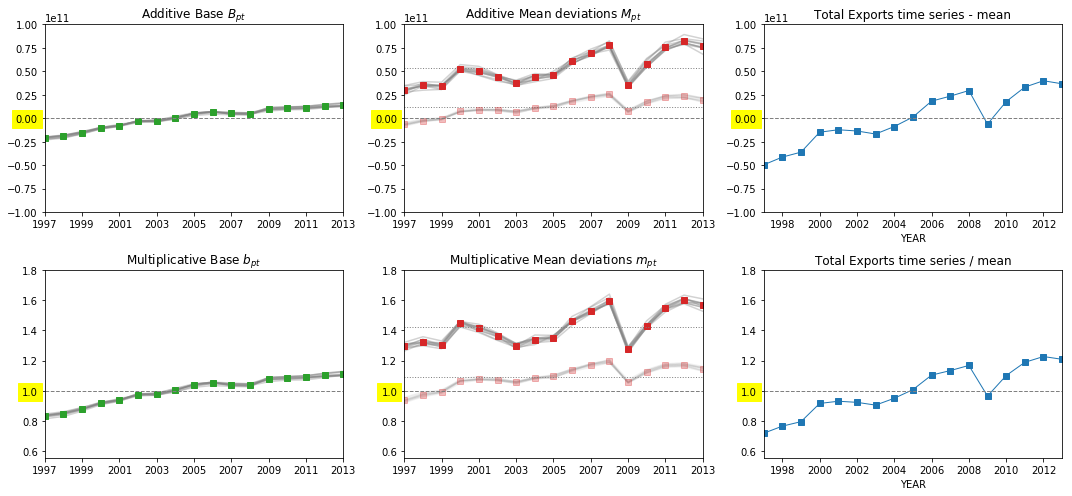

In [734]:
fig, axs = plt.subplots(2, 3, figsize = (15, 7))

P = 10
s = 0.5

ax = axs[0][0]
ax.set_title(r'Additive Base $B_{pt}$')
deviations_info = bs_base.groupby(level = [0, 1]).mean().loc[s]
deviations_info = P*deviations_info.subtract(deviations_info.mean(1), axis = 0)  # This is to subtract Sq from Bq

deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#2ca02c')
ax.set_ylim(-1e11, 1e11)
ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
ax.get_yticklabels()[4].set_backgroundcolor('yellow')


ax = axs[0][1]
ax.set_title(r'Additive Mean deviations $M_{pt}$')

## Full magnitude
deviations_info = P*fe.groupby(level = [0, 1]).mean().loc[s]
ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')
deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, c = '#d62728', ax = ax)

## Half magnitude
deviations_info = P*fe.groupby(level = [0, 1]).mean().loc[0.25]
ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')
deviations_info.T.plot(c = '.5', alpha = .1, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, c = '#d62728', ax = ax, alpha = .3)

ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
ax.set_ylim(-1e11, 1e11)
ax.get_yticklabels()[4].set_backgroundcolor('yellow')


ax = axs[0][2]
ax.set_title(r'Total Exports time series - mean')
deviations_info = sales.sum().subtract(sales.sum().mean(), axis = 0)/2
deviations_info.plot(marker = 's', lw = 1, ax = ax, legend = False)
ax.axhline(0, lw = 1, c = '.5', linestyle = '--')
ax.set_ylim(-1e11, 1e11)
ax.get_yticklabels()[4].set_backgroundcolor('yellow')

ax = axs[1][0]
ax.set_title(r'Multiplicative Base $b_{pt}$')
deviations_info = bs_base.groupby(level = [0, 1]).mean().loc[s]
deviations_info = deviations_info.div(deviations_info.mean(1), axis = 0)  # This is to subtract Sq from Bq
deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#2ca02c')
# ax.axhline(deviations_info.mean().mean(), lw = 4, c = 'r', linestyle = ':') # mean is on 1
ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
ax.set_ylim(1/1.8, 1.8)
ax.get_yticklabels()[3].set_backgroundcolor('yellow')


ax = axs[1][1]
ax.set_title(r'Multiplicative Mean deviations $m_{pt}$')

## Full magnitude
deviations_info = mul_fe.groupby(level = [0, 1]).mean().loc[s]
deviations_info.T.plot(c = '.5', alpha = .35, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#d62728')
ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')

## Half magnitude
deviations_info = mul_fe.groupby(level = [0, 1]).mean().loc[0.25]
deviations_info.T.plot(c = '.5', alpha = .1, legend = False, ax = ax)
deviations_info.mean().plot(marker = 's', lw = 0, ax = ax, c = '#d62728', alpha = .3)
ax.axhline(deviations_info.mean().mean(), lw = 1, c = '.5', linestyle = ':')

ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
ax.set_ylim(1/1.8, 1.8)
ax.get_yticklabels()[3].set_backgroundcolor('yellow')



ax = axs[1][2]
ax.set_title(r'Total Exports time series / mean')
(sales.sum()/sales.sum().mean()).plot(marker = 's', lw = 1, ax = ax, legend = False)
ax.axhline(1, lw = 1, c = '.5', linestyle = '--')
ax.set_ylim(1/1.8, 1.8)
ax.get_yticklabels()[3].set_backgroundcolor('yellow')

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/components_ts.png')
plt.show()

In [596]:

#### LOAD DATA

for size_sorting in [True, False]:
    bs_base = pd.read_csv('./../../data/bootstraps/bs_base_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])
    bs_totl = pd.read_csv('./../../data/bootstraps/bs_totl_'+['random', 'sorted'][size_sorting]+'_m'+str(n)+'_q'+str(Q)+'csv', index_col=['q', 'm', 's', 'nqs'])

    ### ADDITIVE DECOMPOSITION

    bs_base = bs_base.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    bs_totl = bs_totl.groupby(level = ['s', 'q', 'm']).sum()  # drops the nq, it's not really grouping
    fe_n = (bs_totl - bs_base)
    fe = fe_n.groupby(level = ['s', 'q']).transform('median') 
    noise = fe_n - fe

    ### MULTIPLICATIVE DECOMPOSITION

    mul_fe_noise = bs_totl/bs_base
    # Now, I use the bs to estimate disentangling fe from noise
    mul_fe = mul_fe_noise.groupby(level = ['s', 'q']).transform('median') 
    mul_noise = mul_fe_noise/mul_fe

    # Important: they fulfill
    # bs_totl - bs_base*mul_fe*mul_noise == 0
    # np.log10(bs_totl) - np.log10(bs_base) - np.log10(mul_fe) - np.log10(mul_noise) == 0




    for linear in [True, False]:

        if linear:
            BASE = bs_base
            FE = fe
            NOISE = noise
        else:
            BASE = np.log10(bs_base) # bs_base
            FE = np.log10(mul_fe) # fe
            NOISE = np.log10(mul_noise)# noise


        result_list = []
        obs_parts_cross_cov_list = []

        for m in range(n):
#             if m%10 == 0: print(m)
            for s in [.02, .05, .1, .25, .5]:
                base_m = BASE.loc[(BASE.index.get_level_values('m') == m) & (BASE.index.get_level_values('s') == s)]
                fe_m = FE.loc[(FE.index.get_level_values('m') == m) & (FE.index.get_level_values('s') == s)]
                n_m = NOISE.loc[(NOISE.index.get_level_values('m') == m) & (NOISE.index.get_level_values('s') == s)]

                obs_s_m = pd.concat([base_m, fe_m, n_m])
                obs_s_m.index = pd.MultiIndex.from_product([['base', 'FE', 'noise'],range(Q)], names = ['comp', 'part'])

                cov = obs_s_m.T.cov()

                ####### OUTCOME 1
    #           Save observed cross covariance of the parts

                obs_parts_cross_cov = cov.loc['noise'][['noise']].stack(); obs_parts_cross_cov.index.names = ['partA', 'partB']; obs_parts_cross_cov.columns = ['cov']
                obs_parts_cross_cov['m'] = m; obs_parts_cross_cov['s'] = s
                obs_parts_cross_cov = obs_parts_cross_cov.reset_index().set_index(['s', 'm', 'partA', 'partB'])

                obs_parts_cross_cov_list += [obs_parts_cross_cov]


                # np.log10(abs(obs_s_m.T.cov())).round(1)

                ####### OUTCOME 2
                # Characterize diagonal and offdiagonal for all 3x3 cross components

                ## Make a mask for i = j
                ## Groupby the other level and (we need to sum) but possibly describe.
                part_index = np.array(3*Q*[cov.index.get_level_values('part').values])

                ## Mask for off diagonals
                part_diag_mask = np.equal(part_index, part_index.T)
                pd_diag_mask = pd.DataFrame(part_diag_mask, index = cov.index, columns = cov.columns)


                diag = cov[pd_diag_mask].stack([-2, -1]).groupby(level = [0, 2]).agg(['count', np.mean, np.sum, np.std])
                diag = pd.concat([diag], keys=['diag'], names=['diag'], axis = 0)

                offdiag = cov[~pd_diag_mask].stack([-2, -1]).groupby(level = [0, 2]).agg(['count', np.mean, np.sum, np.std])
                offdiag = pd.concat([offdiag], keys=['offdiag'], names=['diag'], axis = 0)


                result_m = pd.concat([diag, offdiag])
                result_m = pd.concat([result_m], keys=[m], names=['m'], axis = 0)
                result_m = pd.concat([result_m], keys=[s], names=['s'], axis = 0)
                result_m.index.names = ['s', 'm', 'diag', 'compA', 'compB']

                result_list += [result_m]
                
        result_varname = '_'.join(['cov_elements_desc', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear]]); print(result_varname)
        globals()[result_varname] = pd.concat(result_list)
        
        
        result_varname = '_'.join(['parts_cross_cov', ['random', 'sorted'][size_sorting], ['log', 'lin'][linear]]); print(result_varname)
        globals()[result_varname] = pd.concat(obs_parts_cross_cov_list)
                
#         if linear:
#             result_lin = pd.concat(result_list)
#             result_parts_cross_cov_lin = pd.concat(obs_parts_cross_cov_list) ## adapt
#         else:
#             result_log = pd.concat(result_list)
#             result_parts_cross_cov_log = pd.concat(obs_parts_cross_cov_list)


cov_elements_desc_sorted_lin
parts_cross_cov_sorted_lin
cov_elements_desc_sorted_log
parts_cross_cov_sorted_log
cov_elements_desc_random_lin
parts_cross_cov_random_lin
cov_elements_desc_random_log
parts_cross_cov_random_log


In [597]:
pd.options.display.max_columns = 99
pd.options.display.max_rows = 99

In [598]:
# bs_base + fe + n - bs_totl == 0 . OK

# I want sum of cross covariance terms for components of the same m

# there are 6 varieties of combination (b, fe), (fe, n), (n, b), bb nn fefe, on diagonal (i = j) and off diagonal.

# Not sure what is a practical way to slice data and cov matrices...
# But anyway everything I want is just here.

In [599]:
import matplotlib.pyplot as plt
%matplotlib inline

In [600]:
result_log_scaled = result_log.copy()
result_log_scaled[['mean','sum','std']] = component_scale_factor*result_log[['mean','sum','std']]

In [601]:
component_scale_factor = (((yqs/2).mean(1)*np.log(10))**2).mean()   ## This is (Sq*ln10)**2, but Sq/2 because of BS

In [602]:
# for linear in [True, False]:

#     if linear:
#         result = result_lin
#     else:
#         result = result_log_scaled
        
#     plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

#     fig, ax = plt.subplots(1, figsize = (24, 7))
# # ...
#     plt.show()


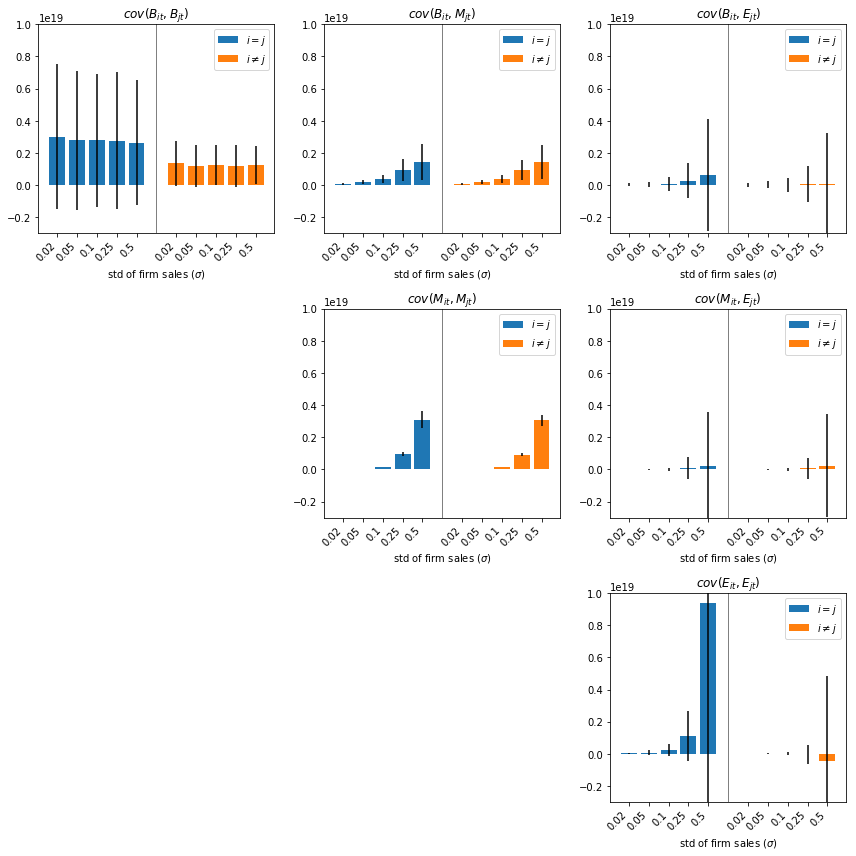

In [655]:
result = cov_elements_desc_random_lin
plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()

fig, axs = plt.subplots(3,3, figsize = (12, 12))
# plot_data = result.reset_index().groupby(['compA', 'compB', 'diag', 's']).mean().drop('m', axis = 1).reset_index()
plot_data['i'] = plot_data.compA.map({'FE': 1, 'base': 0, 'noise': 2})
plot_data['j'] = plot_data.compB.map({'FE': 1, 'base': 0, 'noise': 2})

# box titles 
titles = np.array([[r'$cov(B_{it}, B_{jt})$', r'$cov(B_{it}, M_{jt})$', r'$cov(B_{it}, E_{jt})$'], ['', r'$cov(M_{it}, M_{jt})$', r'$cov(M_{it}, E_{jt})$'], ['','' , r'$cov(E_{it}, E_{jt})$']])

for i in range(3):
    for j in range(3):
        ax = axs[i][j]
        if i <= j:
            ax.set_title(titles[i][j])
            slice_data = plot_data.loc[(plot_data.i == i) & (plot_data.j == j)].reset_index(drop = True)

            diag_data = slice_data.loc[slice_data.diag == 'diag']
            p1 = ax.bar(diag_data.index, diag_data['mean'], yerr = diag_data['std'])

            offdiag_data = slice_data.loc[slice_data.diag == 'offdiag']
            p2 = ax.bar(offdiag_data.index + 1, offdiag_data['mean'], yerr = offdiag_data['std'])

            ax.set_ylim(-3e18, 1e19)
            
            labels = []
            ax.set_xticks(list(diag_data.index) + list(offdiag_data.index + 1))
            ax.set_xticklabels(slice_data.s.values, rotation=45, ha = 'right')
            
            ax.legend((p1[0], p2[0]), (r'$i = j$', r'$i \neq j$'))
            
            ax.axvline(5, c = '.5', lw = 1)
            
            ax.set_xlabel('std of firm sales '+r'$(\sigma)$')

        else:
            ax.set_axis_off()
            
plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/components_crosscov.png')
plt.show()

## Cross covariances of parts

In [733]:
rand

cov                        
                          mean        median       std
s    partA partB                                      
0.02 0     0      2.318749e-05  2.722522e-06  0.000061
           1      7.943348e-08 -1.081910e-07  0.000004
           2      1.269718e-07 -7.670452e-08  0.000004
           3     -1.035264e-06 -3.914776e-07  0.000005
           4     -5.359212e-07 -3.137861e-07  0.000006
           5     -1.880230e-07 -6.219568e-08  0.000004
           6     -6.669351e-07 -2.825775e-07  0.000004
           7     -6.513036e-07 -2.227515e-07  0.000008
           8     -3.127131e-08 -2.550488e-07  0.000005
           9     -3.976234e-08  1.046234e-07  0.000005
     1     0      7.943348e-08 -1.081910e-07  0.000004
           1      1.790193e-05  2.586782e-06  0.000058
           2     -6.891233e-07 -4.822763e-08  0.000005
           3     -1.361736e-07  1.815694e-09  0.000005
           4     -1.360841e-06 -5.221565e-07  0.000006
           5     -5.926970e-07 -3.223474e-07  0.000004
           6     -3.671424e-07 -2.074280e-07  0.000004
           7     -8.251800e-07 -2.307159e-07  0.000005
           8      6.177010e-07  2.326562e-07  0.000005
           9     -7.396602e-07 -1.520706e-07  0.000006
     2     0      1.269718e-07 -7.670452e-08  0.000004
           1     -6.891233e-07 -4.822763e-08  0.000005
           2      2.187852e-05  2.842970e-06  0.000058
           3     -7.652883e-07  1.365497e-08  0.000007
           4     -1.553702e-07 -1.545375e-07  0.000005
           5     -3.797698e-07 -1.831893e-07  0.000004
           6     -5.319111e-07  2.126034e-07  0.000005
           7     -9.699775e-07 -3.392366e-07  0.000006
           8     -1.272252e-06 -2.862487e-07  0.000007
           9     -5.082294e-07 -3.448808e-08  0.000005
     3     0     -1.035264e-06 -3.914776e-07  0.000005
           1     -1.361736e-07  1.815694e-09  0.000005
           2     -7.652883e-07  1.365497e-08  0.000007
           3      2.858773e-05  3.293015e-06  0.000077
           4     -2.504425e-07 -2.189466e-07  0.000005
           5     -2.374024e-07  1.946929e-07  0.000006
           6     -6.515979e-07 -2.297314e-07  0.000005
           7      7.367448e-08 -6.846247e-08  0.000006
           8     -7.858942e-07 -6.445064e-07  0.000007
           9     -9.878558e-07 -3.134091e-07  0.000006
     4     0     -5.359212e-07 -3.137861e-07  0.000006
           1     -1.360841e-06 -5.221565e-07  0.000006
           2     -1.553702e-07 -1.545375e-07  0.000005
           3     -2.504425e-07 -2.189466e-07  0.000005
           4      2.241386e-05  5.153897e-06  0.000052
           5     -9.263273e-07 -4.330919e-08  0.000005
           6     -4.477705e-07  1.053092e-09  0.000004
           7     -6.496741e-07 -8.944990e-08  0.000008
           8     -1.387685e-06 -2.533048e-07  0.000007
...                        ...           ...       ...
0.50 5     1     -3.083271e-04 -1.781532e-04  0.003635
           2     -5.661431e-04 -6.802284e-05  0.003584
           3     -7.522745e-04 -2.479391e-04  0.003116
           4     -6.342309e-04 -2.016749e-04  0.004010
           5      5.212031e-03  1.461045e-03  0.007649
           6     -2.406643e-04 -8.954231e-05  0.003310
           7      1.895080e-04  6.541959e-05  0.002296
           8      4.090748e-05 -9.889464e-05  0.003102
           9     -3.343282e-04 -1.767063e-04  0.002382
     6     0     -2.519170e-04 -1.909026e-05  0.002534
           1     -1.934023e-04 -6.465618e-05  0.002605
           2     -1.823578e-04  8.305520e-06  0.002854
           3     -3.404947e-04 -1.478795e-04  0.002274
           4     -8.816756e-05  7.311869e-05  0.002854
           5     -2.406643e-04 -8.954231e-05  0.003310
           6      4.161383e-03  1.610042e-03  0.006545
           7      6.810097e-05  1.236586e-04  0.002830
           8     -6.194943e-04 -1.369833e-04  0.002463
           9     -1.221699e-04 -6.500421e-05  0.001848
     7     0     -4.633584e-04 -1.857366e-04  0.002192
           1

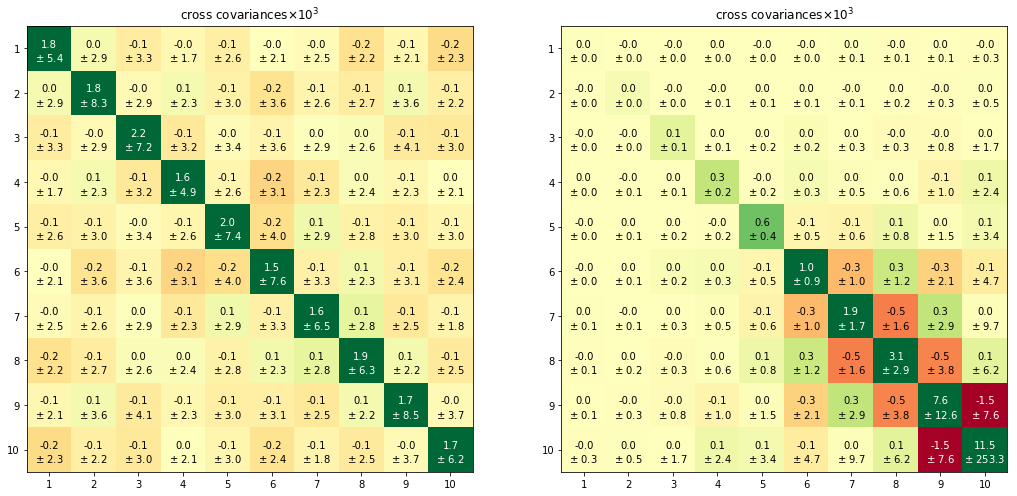

In [654]:


rand = parts_cross_cov_random_log.groupby(level = ['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])
sort = parts_cross_cov_sorted_log.groupby(level = ['s', 'partA', 'partB']).agg(['mean', 'median', 'std'])

fig, axs = plt.subplots(1, 2, figsize = (15, 7))

for i, df in enumerate([rand, sort]):
    ax = axs[i]
    mat_data = df.loc[0.5]['cov']['median'].unstack().values
    std_data = df.loc[0.5]['cov']['std'].unstack().values
    avg_magnitude = np.log10(abs(mat_data).mean()).round(); c = 3 #c = int(-avg_magnitude)

    mat_data_sc = mat_data*10**(c)
    std_data_sc = std_data*10**(c)

    im = ax.imshow(mat_data_sc, vmin = -1, vmax = 1, cmap = 'RdYlGn')

    # Show all ticks...
    ax.set_xticks(range(Q))
    ax.set_yticks(range(Q))
    # ... and label them with the respective list entries
    ax.set_xticklabels(range(1, Q + 1))
    ax.set_yticklabels(range(1, Q + 1))

    # Anotate mean values
    for i in range(Q):
        for j in range(Q):
            if abs(mat_data_sc[i, j]) > .8:
                text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                               ha="center", va="center", color="w")
            else: 
                text = ax.text(j, i-.1, round(mat_data_sc[i, j], 1),
                               ha="center", va="center", color="k")

    # Anotate stds
    for i in range(Q):
        for j in range(Q):
            if abs(mat_data_sc[i, j]) > .8:
                text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                               ha="center", va="center", color="w")
            else: 
                text = ax.text(j, i+.2, r'$\pm\ $'+str(round(std_data_sc[i, j], 1)),
                               ha="center", va="center", color="k")

    ax.set_title("cross covariances" + r'$\times 10^{{{}}}$'.format(c))
fig.tight_layout()

plt.savefig('./../../../WRITING/paper1_writing/figures/parts_crosscov.png')
plt.show()

In [221]:
xx

In [35]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


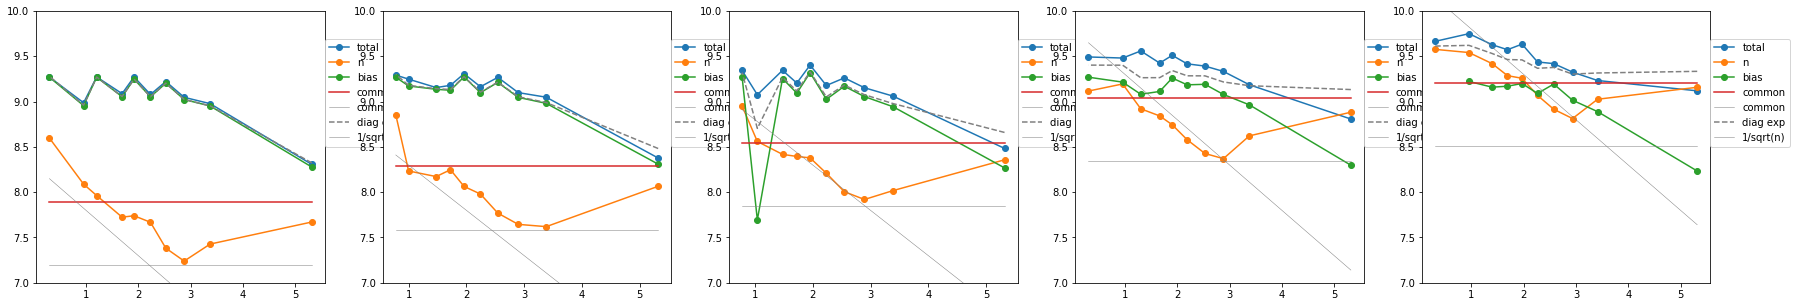

In [36]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
    ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 10)
plt.show()

In [ ]:
## Same thing but I want no biases. So, I want an effective nq and use a lognormal > 3 CDF levels, over T = 17 as base on which to add shocks. Also, now the shocks will be randomised (within quantile?)

## Zero BIAS

### Load data

In [5]:
df = pd.read_csv('./../../data/processed/ID_Y.csv')
# df = pd.read_csv('./../../data/processed/.csv')

sales = df.loc[df.IMPORT == 0].groupby(['ID', 'YEAR'])['VART'].sum().unstack()
sales = sales.loc[sales.sum(1).sort_values().index]

logsales = np.log10(sales)
demlogsales = logsales.subtract(logsales.mean(1), axis = 0)

sizes = sales.loc[sales.sum(1).sort_values().index].sum(1)

Q = 10
parts = pd.cut(sizes.cumsum()/sizes.sum(), Q, labels = range(Q)).sort_index()

In [6]:
## Effective Nq
eff_nq = sales.groupby(parts).count().mean(1).round().astype(int)
eff_nq

0    98643
1     4212
2     1414
3      635
4      319
5      168
6       92
7       46
8       17
9        5
dtype: int64

### Size dist Params

In [7]:
from scipy.stats import norm
# from scipy.stats import norm
# from scipy.stats import pareto
from scipy.special import erf

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# emp_nq_med = nq.groupby(level = 0).median()
N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]


T = 17

In [8]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

,Bootstrap nq,Lognormal >3 synthetic dist
0,98643,99224
1,4212,3879
2,1414,1320
3,635,578
4,319,280
5,168,142
6,92,71
7,46,35
8,17,16
9,5,6


In [68]:
# simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.855603,0.124925,-0.556202,0.754995,0.679651,-0.285029,-0.344440,0.300506,0.133646,0.204122,0.128072,0.269839,0.196574,0.410561,-0.558636,0.965063,0.338681
1,-0.115247,0.568392,0.096829,0.229561,0.699253,0.375922,0.920420,0.352167,0.441284,-0.368429,0.060584,-0.007517,-0.037065,0.256715,0.230514,-1.290306,-0.533113
2,0.246388,0.175163,0.567484,-0.125139,0.474628,0.075030,-0.294231,-1.271843,0.466316,0.083461,0.073863,0.220778,-0.305966,0.044564,0.418255,0.432500,-0.316603
3,-0.096302,-0.549506,-0.485404,0.497657,-0.282672,-0.126733,-0.297157,-0.173140,0.116407,0.700566,-1.375174,0.109081,0.129595,0.501470,-0.477268,-0.672560,0.156477
4,0.881532,0.034758,-0.120747,0.619729,0.085256,-0.020762,-0.098300,0.548294,0.027086,0.859226,-0.519419,1.329989,-0.200268,0.334076,0.217633,-0.412918,0.246240
5,0.036245,0.198119,0.326782,0.317731,0.246077,-0.697189,0.078374,-0.345200,-0.974303,-0.195052,-0.715776,0.076121,-1.173304,-1.149231,0.850897,-0.487957,-0.249451
6,-0.018431,0.046261,-0.370548,-0.157612,-0.136731,-0.508404,0.365188,1.010925,0.303191,-0.012908,-0.062657,-0.468819,-0.372400,0.139211,-0.122603,0.908546,-0.079751
7,-0.174348,0.136038,0.221311,0.009663,-0.397994,-0.586853,-0.441103,0.298593,0.143926,0.067116,0.100249,0.927174,0.196662,0.015155,-0.774149,0.167093,0.058533
8,0.046647,0.934933,-0.081123,-0.093249,-0.004327,-0.429582,-0.028602,-1.839273,0.074379,0.714942,0.189574,0.277673,-0.475363,0.213483,-0.251590,-0.445983,0.232027
9,0.085818,0.212837,-0.060390,0.191548,0.753861,1.043670,-1.097961,-0.375609,0.258479,-0.043358,0.619912,0.394758,0.204064,-0.018015,-0.133602,-0.018397,-0.228464


### Decomposition into Common shocks and noise

In [86]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

#         micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
#         zero_shock = logsales.notna().multiply(logsales.mean(1), axis = 0).replace(0, np.nan)
        
#         simu_shocks = (s/micro_s)*logsales.sub(logsales.mean(1), axis = 0)

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock)
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        common_R = noise.groupby(total['q']).sum().median()
        # optional, broadcast to 2d Q x T
        common_R = pd.DataFrame(np.outer(np.ones(Q), common_R.values), columns=common_R.index)

        noise_qs = noise.groupby(total['q']).sum() - common_R
        base_qs = base.groupby(total['q']).sum()
        yqs = common_R + noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1), common_R.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var', 'common_R_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [87]:
bs_result = pd.concat(out_list)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

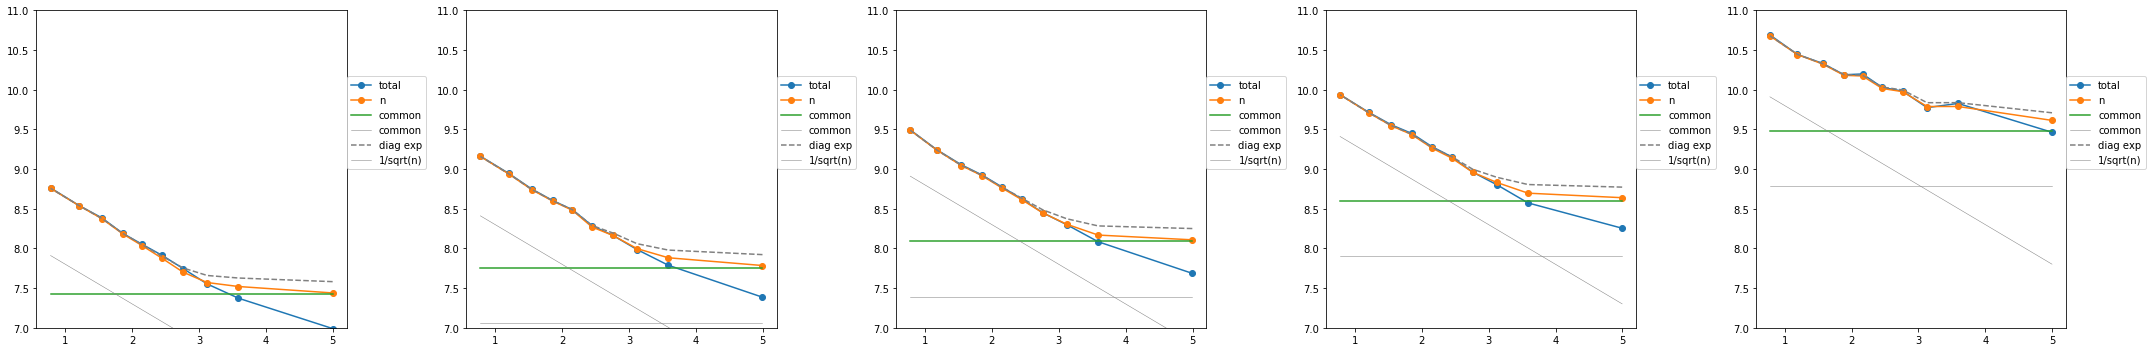

In [88]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise
#     ax.plot(lognqs, np.log10(np.sqrt(data_s['base_var'].values)), marker = 'o', label = 'bias') # std of bias
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values)), label = 'common') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values) /5), label = 'common', lw = .5, c = '.5') # std of the common trend
    ax.plot(lognqs, np.log10(np.sqrt(data_s['common_R_var'].values + data_s['base_var'].values + data_s['noise_var'].values)), linestyle = '--', c = '.5', label = 'diag exp') # std of the common trend
    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

### Decomposition into only noise

In [39]:

dem = logsales.sub(logsales.mean(1), axis = 0)
sample_shocks = dem.loc[dem.count(1) > 1].unstack().dropna() # (1.6 m real shocks)
micro_s = logsales.sub(logsales.mean(1), axis=0).unstack().std()
zero_shock = pd.DataFrame(pd.concat(T * [pd.Series(x_logn_clip3)], axis = 1))
zero_shock.columns = sales.columns

out_list = []

n = 50
Q = 10

for m in range(n):
    print(m)
    for s in [.02, .05, .1, .25, .5]:

#         df_bs = sales.sample(frac = .5)
#         df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

#         logsales = np.log10(sales)
        simu_shocks = pd.DataFrame((s/micro_s)*np.random.choice(sample_shocks.values, zero_shock.shape))
        simu_shocks.columns = sales.columns

        total = np.power(10, zero_shock + simu_shocks)
        base = np.power(10, zero_shock) # Is really frozen in this case
        noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)
        
        total['q'] = pd.cut(total.sum(1).cumsum(), Q, labels = range(Q))

        noise_qs = noise.groupby(total['q']).sum()
        base_qs = base.groupby(total['q']).sum()
        yqs = noise_qs + base_qs
        
        nqs = total['q'].value_counts().values
#         lognqs = np.log10(nqs)
        
        out = pd.concat([yqs.var(1), noise_qs.var(1), base_qs.var(1)], axis = 1)
        out.columns = ['yqs_var', 'noise_var', 'base_var']
        out['q'] = range(Q); out['m'] = m; out['nqs'] = nqs; out['s'] = s;

        out_list += [out]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [40]:
bs_result = pd.concat(out_list).reset_index(drop = True)
# data = bs_result.groupby(['q', 's']).agg(['mean', 'std']).drop('m', axis = 1)
data = bs_result.groupby(['q', 's']).median().drop('m', axis = 1)

In [43]:
## Fit the 1/n

fit_data = np.log10(data[['nqs', 'yqs_var']])

for s in fit_data.index.get_level_values('s').unique():
    fit_data_s = fit_data.loc[fit_data.index.get_level_values('s') == s]
    fit_data_s = fit_data_s.loc[fit_data_s.nqs < 4]

    x = fit_data_s.nqs
    y = fit_data_s.yqs_var
    z = np.polyfit(x, y, 1); p = np.poly1d(z);
    
    print(s, p/2)

0.02  
-0.4973 x + 9.152
0.05  
-0.4938 x + 9.526
0.1  
-0.4961 x + 9.842
0.25  
-0.478 x + 10.32
0.5  
-0.3048 x + 10.8


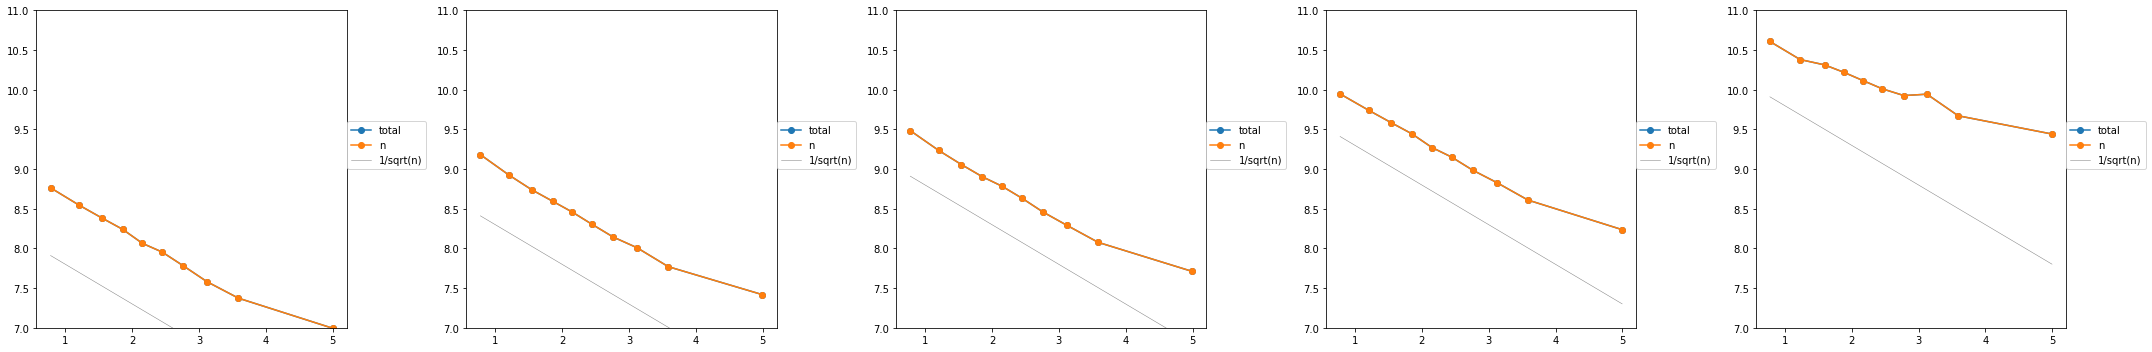

In [44]:
fig, axs = plt.subplots(1, 5, figsize = (30, 5))


for i, s in enumerate([.02, .05, .1, .25, .5]):
    ax = axs[i]
    data_s = data.loc[data.index.get_level_values('s') == s]
    lognqs = np.log10(data_s.nqs).values

    ax.plot(lognqs, np.log10(np.sqrt(data_s['yqs_var'].values)), marker = 'o', label = 'total') # actual std of quantiles
    ax.plot(lognqs, np.log10(np.sqrt(data_s['noise_var'].values)), marker = 'o', label = 'n') # std of statistical noise

    ax.plot(lognqs, .5*i + 8.3-lognqs/2, label = '1/sqrt(n)', lw = .5, c = '.5')
    ax.legend(loc = (1, .5))
    ax.set_ylim(7, 11)
plt.tight_layout()
plt.show()

In [ ]:
xx

In [ ]:
total =  quantile bases: [ np.power(10, zero_shock) ]  +  quantile noises: [ np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock) ] = line + shocks + quantiles

In [89]:
# total = np.power(10, zero_shock + simu_shocks)
# base = np.power(10, zero_shock)
# noise = np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)

# total_q = total.groupby(df_bs['q']).sum()
# base_q = base.groupby(df_bs['q']).sum()
# noise_q = noise.groupby(df_bs['q']).sum()

# q = 5
# print(total_q.iloc[q].var())
# print(pd.concat([noise_q.iloc[q], base_q.iloc[q]], axis = 1).cov().sum().sum())

# for q in range(Q):
#     print(q)
#     (( np.power(10, zero_shock + simu_shocks)).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     (np.power(10, zero_shock).groupby(total['q']).sum()).iloc[q].plot()#.T.plot(legend = False)

#     ((np.power(10, zero_shock + simu_shocks) - np.power(10, zero_shock)).groupby(total['q']).sum()).iloc[q].plot(linestyle = '--')#.T.plot(legend = False)
#     plt.ylim(0, 2.5e10)

#     plt.show()

In [ ]:
## Non scaled, sanity check.

In [267]:
# out_list = []
qs_bs_list = []
parts_bs_list = []
# nq_list = []
# trend_std_list = []

n = 50
Q = 10

for m in range(n):

    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting

    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

    nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()

    common_trend = df_bs.median()

    x = np.log10(common_trend).index.astype(int).values
    y = np.log10(common_trend).values
    z = np.polyfit(x, y, 1); p = np.poly1d(z);

    exp_curve = pd.Series(np.power(10, p(x)), index = x)

#         df_bs = df_bs/(.5 * exp_curve)
    shocks = common_trend/exp_curve
    df_bs = df_bs/(shocks*exp_curve) # == df_bs/common_trend

    parts_bs_2 = pd.concat([exp_curve, shocks, df_bs.sum()], axis = 1).T
    parts_bs_2['m'] = m; parts_bs_2['s'] = s
    parts_bs_list += [parts_bs_2]


    df_bs['nq'] = nq; df_bs['m'] = m; df_bs['s'] = s;
    qs_bs_list += [df_bs]

#         trend_std_list += [np.log10(common_trend/np.power(10, p(x))).std()]


parts_bs_2 = pd.concat(parts_bs_list)
qs_bs_2 = pd.concat(qs_bs_list)

In [175]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

1615735

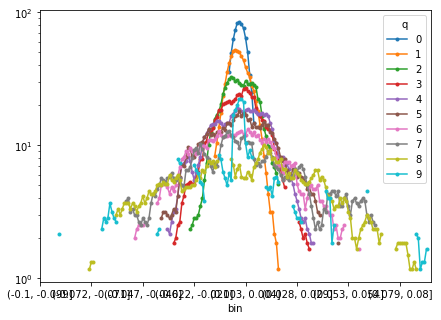

In [179]:
# # BS for sorted quantile partitions
# n = 50
# out = []

# for m in range(n):
#     df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
#     df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

# #     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
# #     nq = df_bs.q.value_counts()  ## Total count n

#     df_bs = df_bs.groupby('q').sum()
#     out += [df_bs]
    
# bs_data = pd.concat(out)

# demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
# # var_nq = pd.concat([demedianed_log10.var(1), nq], axis = 1); var_nq.columns = ['var', 'nq']
# # quantile shocks

# qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
# # qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))
# qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))

# qshocks_hist = pd.DataFrame(qshocks.groupby(['bin', 'q']).size().unstack())

# qshocks_hist.rolling(6, center = True).mean().plot(figsize = (7, 5), marker = '.')
# plt.yscale('log')
# plt.show()


In [198]:
# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))

#     nq = df_bs.groupby('q').count().mean(1) ## Effective nq
#     nq = df_bs.q.value_counts()  ## Total count n

    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data = pd.concat(out)

demedianed_log10 = np.log10(bs_data/pd.concat(n*[bs_data.groupby(level = 0).median()]))
qshocks = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks['bin'] = pd.cut(qshocks[0], np.arange(-.1, .1, .001))


# BS for sorted quantile partitions
n = 50
out = []

for m in range(n):
    df_bs = sales.sample(frac = .5)
#     df_bs = df_bs.loc[df_bs.sum(1).sort_values().index] #sorting
    df_bs['q'] = pd.cut(df_bs.sum(1).cumsum(), Q, labels = range(Q))
    df_bs = df_bs.groupby('q').sum()
    out += [df_bs]
    
bs_data_unsort_q = pd.concat(out)

demedianed_log10 = np.log10(bs_data_unsort_q/pd.concat(n*[bs_data_unsort_q.groupby(level = 0).median()]))
qshocks2 = demedianed_log10.diff(axis = 1).stack().reset_index()
qshocks2['bin'] = pd.cut(qshocks2[0], np.arange(-.1, .1, .001))



## BS for Aggregate

n = 20

lo_agg = []
hi_agg = []
for m in range(n):
    df_bs = sales.sample(frac = .5)
    df_bs.sum()
    
    agg = np.log10(df_bs.sum()/df_bs.sum().mean())
    
    lo_agg += [agg.quantile(.1)]
    hi_agg += [agg.quantile(.9)]
    
lo_agg = np.array(lo_agg).mean()
hi_agg = np.array(hi_agg).mean()

## Firm sales xlims come from other notebook

## Log Approximation

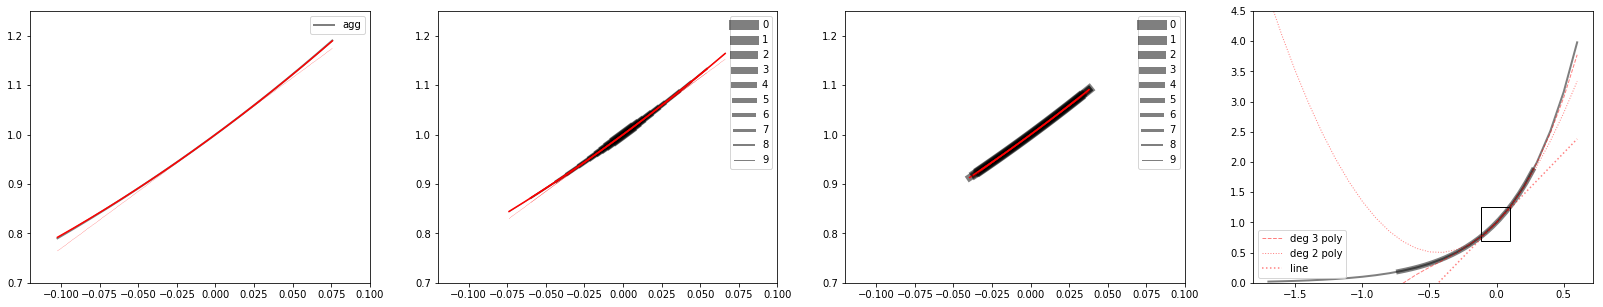

In [211]:
import matplotlib.patches as patches
fig, axs = plt.subplots(1, 4, figsize = (28, 5))


## Aggregate
ax = axs[0]
x = np.arange(lo_agg, hi_agg, 0.001)
y = np.power(10, x)
ax.plot(x, y, label = 'agg', lw = 2, alpha = .5, color = 'k')
ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
ax.plot(x, (np.log(10) * (x))**2/2 + np.log(10) * (x) + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Sorted quantile partition

lo_q = qshocks.groupby('q')[0].quantile(.1)
hi_q = qshocks.groupby('q')[0].quantile(.9)

ax = axs[1]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()


### Unsorted quantile partition

lo_q = qshocks2.groupby('q')[0].quantile(.1)
hi_q = qshocks2.groupby('q')[0].quantile(.9)

ax = axs[2]
for q in range(Q):
    x = np.arange(lo_q[q], hi_q[q], 0.001)
    y = np.power(10, x)
    ax.plot(x, y, label = q, lw = 10 - q, alpha = .5, color = 'k')
    ax.plot(x, np.log(10) * (x) + 1, c = 'r', linestyle = '--', lw = .25)
    ax.plot(x, (np.log(10) * x)**2/2 + np.log(10) * x + 1, c = 'r')
ax.set_xlim(-.12, .1)
ax.set_ylim(.7, 1.25)
ax.legend()

### Firm level
ax = axs[3]
# half_nominal_measure_l = df_demlog_nominal_shrink.loc[df_demlog_nominal_shrink['gap'].cumsum()/df_demlog_nominal_shrink['gap'].sum() < .25].demlog.max()
# half_nominal_measure_r = df_demlog_nominal_growth.loc[df_demlog_nominal_growth['gap'].cumsum()/df_demlog_nominal_growth['gap'].sum() < .75].demlog.max()

x90 = np.arange(-1.7, 0.7, .1)
x75 = np.arange(-.73, 0.32, .05)  # Only 25% of the value in added in shocks smaller than this, 25% of the value in added in shocks larger than this

ax.plot(x90, np.power(10, x90), lw = 2, alpha = .5, color = 'k')
ax.plot(x75, np.power(10, x75), lw = 5, alpha = .5, color = 'k')

ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2 + (np.log(10)*x90)**3/6, linestyle = '--', alpha = .5, c = 'r', lw =1, label = 'deg 3 poly')
ax.plot(x90, 1 + np.log(10)*x90 + (np.log(10)*x90)**2/2, linestyle = ':', alpha = .5, c = 'r', lw =1, label = 'deg 2 poly')
ax.plot(x90, 1 + np.log(10)*x90, linestyle = ':', alpha = .5, c = 'r', label = 'line')

# Create a Rectangle patch
rect = patches.Rectangle((-.12, .7), .1- (-.12), 1.25 - .7,linewidth=1,edgecolor='k',facecolor='none')
ax.add_patch(rect)

ax.legend()
ax.set_ylim(0, 4.5)

plt.show()

In [48]:

# data = qshocks_hist.rolling(6, center = True).mean()
# data = data.loc[[-.05 < m.mid < .05 for m in data.index]]

# quad_params = []

# for q in range(Q):
#     x = [m.mid for m in data[q].dropna().index]
#     y = data[q].dropna().values
#     z = np.polyfit(x, y, 2)
#     p = np.poly1d(z)
# #     print(p)
#     quad_params += [z]
    
# quad_params = np.array(quad_params)


# # NQs from bootstrap
# var_nq['m'] = [i//Q for i in range(n*Q)]
# nq = var_nq.reset_index().set_index(['q', 'm'])['nq'].unstack().median(1)


# fig, axs = plt.subplots(1, 2, figsize = (16, 5))

# ax = axs[0]
# ax.plot(range(Q), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(range(Q), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('q'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()


# ax = axs[1]
# ax.plot(np.log10(nq.values), -quad_params[:, 1]/(2*quad_params[:, 0]), label = 'mu_q')
# ax.plot(np.log10(nq.values), 1/np.sqrt(-2*quad_params[:, 0]), marker = '.', label = 'sigma_q')
# ax.set_xlabel('log_n'); ax.set_ylabel('log pts')
# ax.axhline(0, c = '.5', linestyle = '--')
# ax.legend()

# plt.show()

## Fit to theoretical deduction with "narrow bin" approximation

In [49]:

## Microshocks

demlogsales['parts'] = parts
std_data = demlogsales.loc[demlogsales.iloc[:, :-1].count(1) > 1]
std_data.reset_index().set_index(['ID', 'parts']).stack().groupby(level = 'parts').std()


# Un array de donde samplear shocks empiricos.
emp_shocks = std_data.reset_index().set_index(['ID', 'parts']).stack().values
len(emp_shocks)

1615735

In [50]:
def percentile_lo (x): 
    return np.percentile(x, q=10)
def percentile_hi (x): 
    return np.percentile(x, q=90)

In [ ]:
nqs

In [53]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
partition = eff_nq.astype(int)
ss = np.arange(0.1, .8, .1)
M = 25

T = 17

In [54]:

### Experiments (gaussian and laplace deviations from mean)

results = []

s0 = emp_shocks.std()

for dist in ['norm', 'lapl', 'emp']:
    for q in range(Q)[1:]:
        part = partition.index[q]
        n = partition.values[q]
#         x0 = np.log10(sizes.loc[parts == part]).values # comment for narrow bin limit
        print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/s0)).reshape(n, T)
                    
                values = np.log10(np.power(10, shocks).sum(0)/n) #M?
#                 values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M? # comment for narrow bin limit

#             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]
                results += [[dist, s, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'nq', 'repeat', 'mean', 'std'])


1 4212
2 1414
3 635
4 319
5 168
6 92
7 46
8 17
9 5
1 4212
2 1414
3 635
4 319
5 168
6 92
7 46
8 17
9 5
1 4212
2 1414
3 635
4 319
5 168
6 92
7 46
8 17
9 5


### vs micro sigma

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in log10


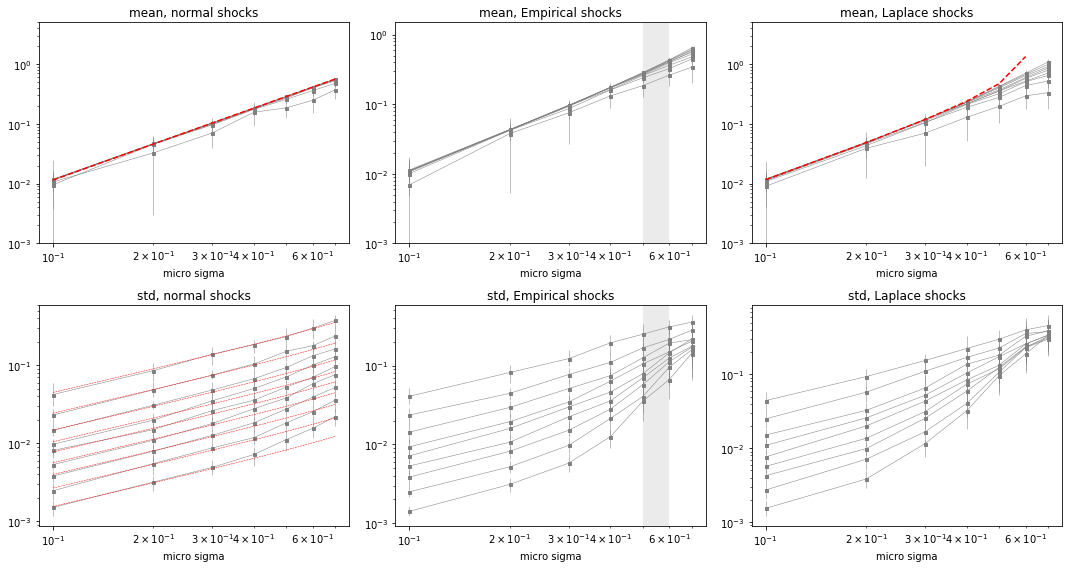

In [55]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
# for n0 in partition.values[1:]:
#     ax.plot(x, np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)
for n0 in partition.values[1:]:
    ax.plot(x, np.sqrt((np.exp(x**2) - 1)/n0), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')
ax.set_yscale('log')
    
    
#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.axvspan(.5, .6, facecolor='.85', alpha=0.5)

ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')


#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_sigma.png')
plt.show()

### vs log(nq)

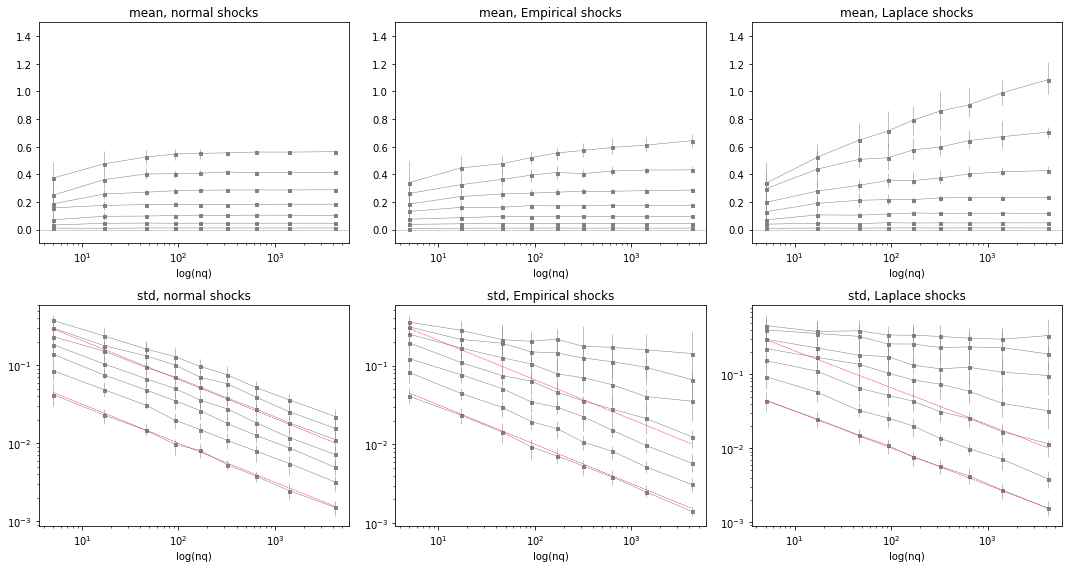

In [56]:

fig, axs = plt.subplots(2, 3, figsize = (15, 8))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
ax.set_xscale('log')
#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')

ax.set_xscale('log')
#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values
for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(emp_nq_med), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 

ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Laplace shocks')

# logplot_data = np.log10(plot_data)
y_data = plot_data['std']['mean'].unstack()
yhi_data = plot_data['std']['percentile_hi'].unstack() - plot_data['std']['mean'].unstack()
ylo_data = plot_data['std']['mean'].unstack() - plot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')
ax.set_xscale('log')
ax.set_yscale('log')

for s0 in [0.1, 0.6]:
    ax.plot(x, np.sqrt((np.exp(s0**2) - 1)/x), color = 'r', linestyle = '--', zorder = 10, lw = .5)

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/power_sums_vs_nq.png')
    
plt.show()

In [ ]:
xx

## Repeat, non narrow bins, i.e. sizes in x0 used

### Bootstrap on empirical data

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [208]:
# bs_data = qs_bs.loc[qs_bs.s == .1].drop(['nq', 'm', 's'], axis = 1)

# # Empirical stds
# emp_std_lo = np.log10(bs_data).std(1).groupby(level = 0).quantile(.1)
# emp_std_mn = np.log10(bs_data).std(1).groupby(level = 0).mean()
# emp_std_hi = np.log10(bs_data).std(1).groupby(level = 0).quantile(.9)

# # Nqs
# emp_nq_med = nq.groupby(level = 0).median()



In [57]:
qs_bs_2['std'] = np.log10(qs_bs_2[np.arange(1997, 2014)]).std(1)
grouped_2 = qs_bs_2.reset_index().groupby(['q', 's'])

emp_plot_data_2 = grouped_2['std'].median().unstack()
emp_plot_data_lo_2 = grouped_2['std'].quantile(.25).unstack()
emp_plot_data_hi_2 = grouped_2['std'].quantile(.75).unstack()
nqs = grouped_2['nq'].median().unstack().iloc[:, 0]

NameError: name 'qs_bs_2' is not defined

In [58]:
# np.log10(emp_plot_data_hi_2.values.flatten())

In [59]:
qs_bs['std'] = np.log10(qs_bs[np.arange(1997, 2014)]).std(1)
grouped = qs_bs.reset_index().groupby(['q', 's'])
emp_plot_data = grouped['std'].median().unstack()
emp_plot_data_lo = grouped['std'].quantile(.25).unstack()
emp_plot_data_hi = grouped['std'].quantile(.75).unstack()
nqs = grouped['nq'].median().unstack().iloc[:, 0]

fig, axs = plt.subplots(1, 2, figsize = (18, 6))

#################
    
ax = axs[0]
ax.set_title('std, Empirical shocks')

ax.set_xlabel('log(nq)')

for s in emp_plot_data.columns:
    ax.plot(np.log10(nqs), np.log10(emp_plot_data[s]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi[s]), np.log10(emp_plot_data_lo[s]), color = '.8', alpha = .25, label = 'common_shocks_std')
    
    ax.plot(np.log10(nqs), np.log10(np.sqrt((np.exp(s**2) - 1)/nqs)), color = 'r', linestyle = '--', zorder = 10, lw = .5)
ax.fill_between(np.log10(nqs), np.log10(emp_plot_data_hi_2.values.flatten()), np.log10(emp_plot_data_lo_2.values.flatten()), color = 'g', alpha = .15, label = 'common_shocks_std')

#################
    
ax = axs[1]
ax.set_title('std, Empirical shocks')

emp_plot_data.index = range(Q)

for q in emp_plot_data.index[::3]:
    ax.plot(np.log10(emp_plot_data.columns), np.log10(emp_plot_data.loc[q]), marker = '*', label = 'mu_q', color = '.5', lw = 0)
    ax.fill_between(np.log10(emp_plot_data.columns), np.log10(emp_plot_data_hi.loc[q]), np.log10(emp_plot_data_lo.loc[q]), color = '.8', alpha = .25, label = 'common_shocks_std')

ax.set_xlabel('micro sigma')

plt.show()

NameError: name 'qs_bs' is not defined

Float64Index([0.02, 0.05, 0.1, 0.2, 0.5, 0.9], dtype='float64', name='s')

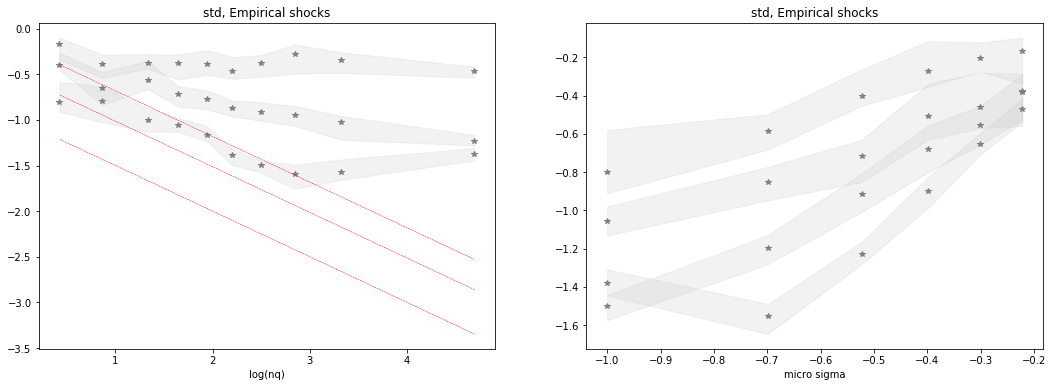

### Synthetic lognormal for x0

In [62]:
from scipy.stats import norm

#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))


N = int(eff_nq.sum().round())

N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

In [65]:
s0 = pd.Series(np.power(10, x_logn_clip3))

s0_n = s0.groupby(pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q))).count()
bs_n = eff_nq.round(1)

show = pd.concat([bs_n, s0_n], axis = 1); show.columns = ['Bootstrap nq', 'Lognormal >3 synthetic dist']
show

,Bootstrap nq,Lognormal >3 synthetic dist
0,98643,99224
1,4212,3879
2,1414,1320
3,635,578
4,319,280
5,168,142
6,92,71
7,46,35
8,17,16
9,5,6


### Computation of variance

In [74]:
emp_nqs = np.round(eff_nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .1)
M = 5

T = 17

In [75]:
### Experiments (gaussian and laplace deviations from mean)
partition_df = s0_n # index are quantile ixs and value has their n.

results = []

sigma0 = emp_shocks.std()

for dist in ['emp']:
    for q in range(Q):
        part = partition_df.index[q]
        n = partition_df.round().astype(int).values[q]
        x0 = pd.Series(x_logn_clip3).loc[pd.cut(s0.cumsum()/s0.sum(), Q, labels = range(Q)) == part].values
#         print(q, n)
        for s in ss:
            for m in range(M):
                if dist == 'norm':
                    shocks = np.random.normal(0, s, (n, T))
                elif dist == 'lapl':
                    shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
                elif dist == 'emp':
                    shocks = (np.random.choice(emp_shocks, n * T)*(s/sigma0)).reshape(n, T)
                    
#                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
                results += [[dist, s, q, n, m, values.mean(), values.std()]]

result = pd.DataFrame(results, columns = ['dist', 's', 'q', 'nq', 'repeat', 'mean', 'std'])


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in log10


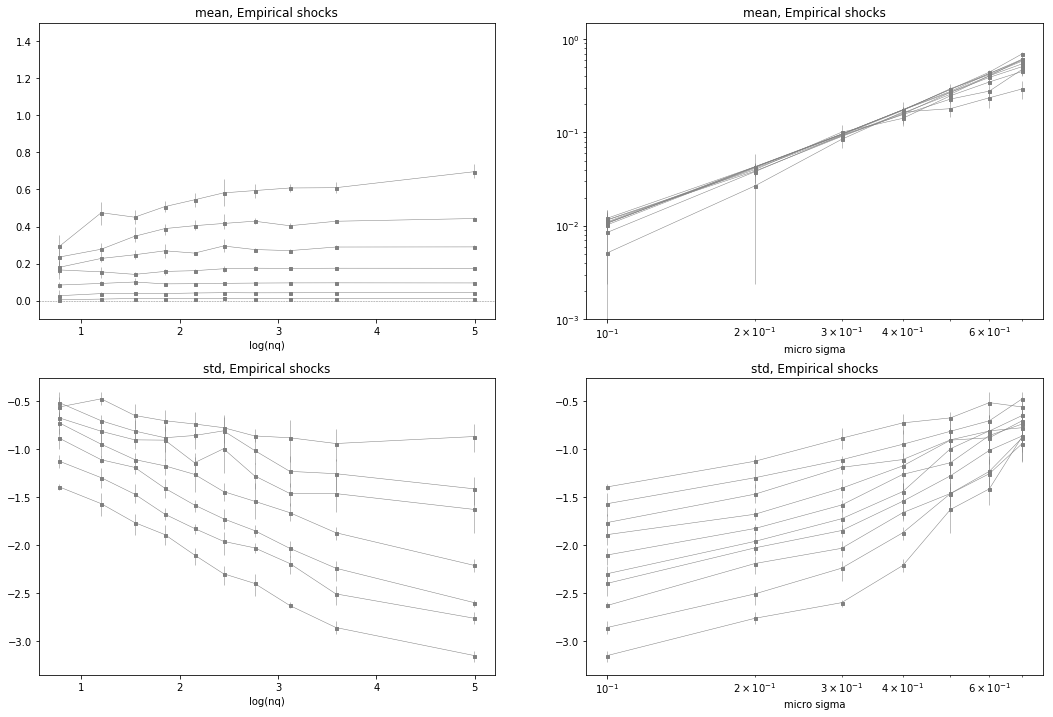

In [106]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Empirical Shocks
# plot_data = result.loc[(result.dist == 'emp') & (result.s >= .5)].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
plot_data = result.loc[(result.dist == 'emp')].groupby(['s', 'nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])

ax = axs[0][0]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(eff_nq), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

#################
    
ax = axs[1][0]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = np.log10(y_data.columns.values)

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(eff_nq), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(eff_nq), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# ax.fill_between(np.log10(eff_nq), np.log10(np.quantile(trend_std, .9)), np.log10(np.quantile(trend_std, .1)), color = '.8', alpha = .25, label = 'common_shocks_std')
# ax.axhline(np.mean(trend_std), color = '.5', alpha = .25, lw = .5, label = 'common_shocks_std')

# sqrt(sobs2 - (strend)2) = (sq)
# ax.plot(np.log10(eff_nq), np.log10(np.sqrt(emp_std_mn**2 - np.median(trend_std)**2))) 


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][1]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
xx

In [ ]:

fig, axs = plt.subplots(2, 3, figsize = (27, 12))

#################
# Normal
plot_data = result.loc[result.dist == 'norm'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()

ax = axs[0][0]
ax.set_title('mean, normal shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
## Analytical expectation
ax.plot(x, x**2*np.log(10)/2, color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
ax = axs[1][0]
ax.set_title('std, normal shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

## Analytical expectation
for n0 in emp_nqs:
    ax.plot(x, np.log10(np.sqrt(np.exp(x**2)*(np.exp(x**2) - 1)/n0)), color = 'r', linestyle = '--', zorder = 10, lw = .5)

ax.set_xscale('log')

    
#################
# Laplace
plot_data = result.loc[result.dist == 'lapl'].groupby(['nq','s'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')


## Analytical expectation
ax.plot(x, np.log10(1/(1 - (x*np.log(10))**2/2)), color = 'r', linestyle = '--', zorder = 10)

###
ax.set_yscale('log')
ax.set_ylim(.001, 5)

ax.set_xscale('log')


#################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_xlabel('micro sigma')

ax.set_xscale('log')


#################
# Empirical Shocks
plot_data = result.loc[result.dist == 'emp'].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()


ax = axs[0][2]
ax.set_title('mean, Empirical shocks')

y_data = plot_data['mean']['mean'].unstack()
yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')

###
ax.set_yscale('log')
ax.set_ylim(.001, 1.5)
    
ax.set_xscale('log')

#################
    
ax = axs[1][2]
ax.set_title('std, Empirical shocks')

logplot_data = np.log10(plot_data)
y_data = logplot_data['std']['mean'].unstack()
yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
x = y_data.columns.values

for s in y_data.index.values:
    ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

ax.set_xscale('log')

plt.show()

In [ ]:
### Proximos testeos: size distribution...

In [ ]:
# Para ellos, es todo igual, nomas que hay una distribucion de sizes, los shocks se agregan a ellas y se divide por (X/Q) en vez de (s0*n)

 ### Size distributions

In [107]:
from scipy.stats import norm
from scipy.stats import pareto
from scipy.special import erf

# The size dists are:
#  - Lognormal clipped x > 3. 
sigma = 1.2810683494198207 # 1.3149476902828778
mu = 4.536908110675739 # 4.470439741406725
# 11.5% of guys that would be below the .3 threshold.
z = (mu - 3)/sigma
cum_th = 1 - .5*(1 + erf(z/np.sqrt(2)))

# We'll try different N's, until we can match the avg level of France imports 

N = int(1e5)
N_ = int(round(N/(1 - cum_th))) # We use a larger N ..
draw = np.random.normal(mu, sigma, N_) # so that approximately we'll have N guys above x = 3
draw = np.sort(draw)[-N:]

# Now we can have the n(Q, q)
def get_n(x1, Q):
    x_lin = np.power(10, x1)
    bins = pd.cut(pd.Series(np.cumsum(x_lin)), Q)
    ns = bins.value_counts().values
    return bins, ns

# From the theoretical N and the ppf we can know the theoretical quantiles
x_logn_clip3 = np.array([norm.ppf(q, mu, sigma) for q in np.arange(0, 1, 1/N_) + .5/N_])
x_logn_clip3 = x_logn_clip3[(-N - 1):-1]

## N tail for pareto and lognormal tail
N_tail = get_n(x_logn_clip3, 10)[1][1:].sum()

n = N_tail
x_logn_clip3_90 = x_logn_clip3[-N_tail:]

# PARETO
z_0 = -1.1042021 #-1.1771
# value_qs_1 = x_logn_clip3_90.min() # 6.761 in the original fit
value_qs_1 = 6.67465

norm = 1.375
x1 = np.array([pareto.ppf(b = -z_0, scale = 10**value_qs_1, q = q) for q in np.arange(0, 1, 1/(norm*N_tail)) + .5/(norm*N_tail)])
np.log10(pareto.rvs(b = -z_0, size = n, scale = 10**value_qs_1) + 1)
x1 = x1[int(-norm*N_tail - 1):-1]

x_pareto = np.log10(x1)

In [113]:
# emp_nqs = np.round(nq.sort_values()).astype(int)
ss = np.arange(0.1, .8, .2)
M = 50

T = 17

In [114]:
### Experiments (gaussian and laplace deviations from mean)

results = []


for dist in ['norm', 'lapl']:
    for j, size_dist in enumerate([x_logn_clip3, x_logn_clip3_90, x_pareto]):
        sdist_name = ['Logn', 'Logn90', 'Pareto'][j]
        bins, partition_ns = get_n(size_dist, Q)
        for q, part in enumerate(bins.unique()):
            x0 = pd.Series(size_dist).loc[bins == part].values
            n = partition_ns[q]
            for s in ss:
                for m in range(M):
                    if dist == 'norm':
                        shocks = np.random.normal(0, s, (n, T))
                    elif dist == 'lapl':
                        shocks = np.random.laplace(0, s, (n, T))/np.sqrt(2)
    #                 values = np.log10(np.power(10, shocks).sum(0)/n) #M?
                    # same as before but now x0 is a vector of sizes in the quantile, determined by the size dist, N and the Q chosen.
                    values = np.log10(np.power(10, x0[:, None] + shocks).sum(0)/np.power(10, x0[:, None]).sum(0)) #M?
    #             t += [np.power(10, x0 + x1).sum()/(n*10**mu0)]


                    results += [[dist, sdist_name, s, n, m, values.mean(), values.std()]]

sdist_result = pd.DataFrame(results, columns = ['dist', 'size_dist', 's', 'nq', 'repeat', 'mean', 'std'])


/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in log10


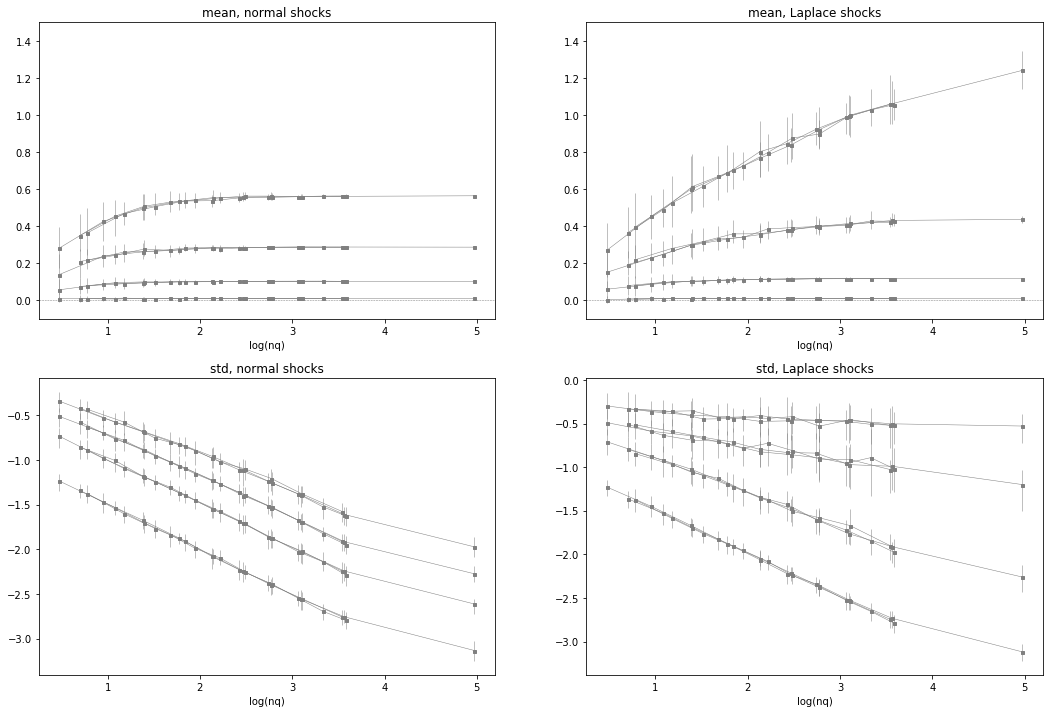

In [115]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('log(nq)')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['s','nq'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('log(nq)')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in log10


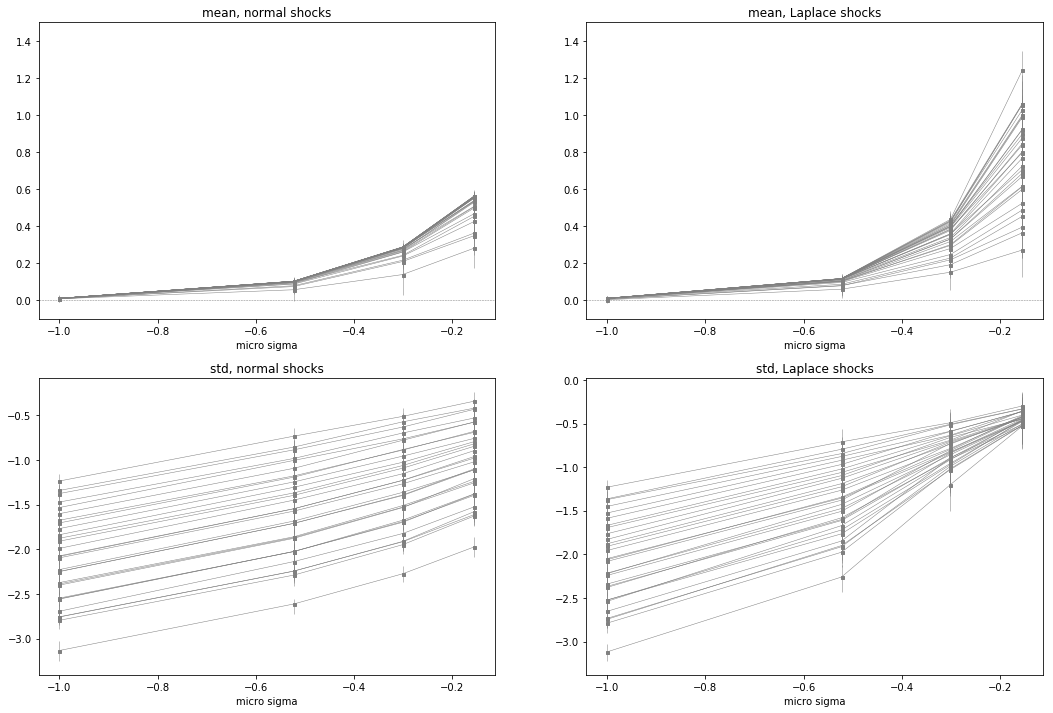

In [116]:

fig, axs = plt.subplots(2, 2, figsize = (18, 12))

#################
# Normal
ax = axs[0][0]
ax.set_title('mean, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
    
ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# #################
ax = axs[1][0]
ax.set_title('std, normal shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'norm')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
# # Laplace

ax = axs[0][1]
ax.set_title('mean, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    
    y_data = plot_data['mean']['mean'].unstack()
    yhi_data = plot_data['mean']['percentile_hi'].unstack() - plot_data['mean']['mean'].unstack()
    ylo_data = plot_data['mean']['mean'].unstack() - plot_data['mean']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)

ax.set_ylim(-.1, 1.5)
ax.axhline(0, color = '.5', lw = .5, linestyle = '--')
ax.set_xlabel('micro sigma')
    
# # Empirical
# ax.fill_between(np.log10(emp_nq_med), emp_mean_hi, emp_mean_lo, color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), emp_mean_mn, marker = '*', label = 'mu_q', color = 'g', lw = 0)

# #################
    
ax = axs[1][1]
ax.set_title('std, Laplace shocks')

for sdist in ['Logn', 'Logn90', 'Pareto']:
    plot_data = sdist_result.loc[(sdist_result.size_dist == sdist) & (sdist_result.dist == 'lapl')].groupby(['nq', 's'])[['mean', 'std']].agg([np.mean, percentile_lo, percentile_hi])#.reset_index()
    logplot_data = np.log10(plot_data)
    y_data = logplot_data['std']['mean'].unstack()
    yhi_data = logplot_data['std']['percentile_hi'].unstack() - logplot_data['std']['mean'].unstack()
    ylo_data = logplot_data['std']['mean'].unstack() - logplot_data['std']['percentile_lo'].unstack()
    x = np.log10(y_data.columns.values)

    for s in y_data.index.values:
        ax.errorbar(x, y_data.loc[s], yerr=[ylo_data.loc[s], yhi_data.loc[s]], lw = .5, color = '.5', marker = 's', markersize = 3)
ax.set_xlabel('micro sigma')

# # Empirical
# ax.fill_between(np.log10(emp_nq_med), np.log10(emp_std_hi), np.log10(emp_std_lo), color = '#1f77b4', alpha = .25, label = 'empirical')
# ax.plot(np.log10(emp_nq_med), np.log10(emp_std_mn), marker = '*', label = 'mu_q', color = 'g', lw = 0)

plt.show()